# PROBLEM STATEMENT

On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

**Objective:** Apply the tools of machine learning to predict which passengers survived the tragedy.

|Variable|Definition|	Key|
| ---| -- |--- |
|survival| 	Survival| 	0 = No, 1 = Yes
|pclass| 	Ticket class| 	1 = 1st, 2 = 2nd, 3 = 3rd
|sex| 	Sex 	| |
|Age| 	Age in years 	| |
|sibsp| 	# of siblings / spouses aboard the Titanic| |
|parch| # of parents / children aboard the Titanic||
|ticket| Ticket number ||	
|fare | Passenger fare||
|cabin| Cabin number ||	
|embarked| 	Port of Embarkation| 	C = Cherbourg, Q = Queenstown, S = Southampton


#### Variable Notes

**pclass**: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: The dataset defines family relations in this way...

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife (mistresses and fiancés were ignored)

**parch**: The dataset defines family relations in this way...

Parent = mother, father

Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
training_data = pd.read_csv('https://raw.githubusercontent.com/SiddharthaSarma/scikit-learn/master/logistic-regression/titanic/train.csv')

In [3]:
training_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
training_data.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


# DATA VISUALIZATION

In [0]:
total = len(training_data)
survived = len(training_data[training_data['Survived'] == 1])
not_survived = len(training_data[training_data['Survived'] == 0])

In [6]:
print('Total =', total)
print('No of passengers survived = ', survived)
print('No of passengers not survived = ', not_survived)

Total = 891
No of passengers survived =  342
No of passengers not survived =  549


In [7]:
print('% survived = ', (survived / total) * 100)
print('% did not survive = ', (not_survived / total) * 100)

% survived =  38.38383838383838
% did not survive =  61.61616161616161


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


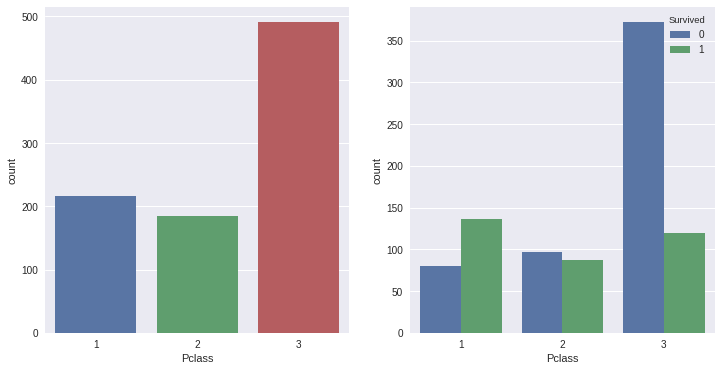

In [8]:
plt.figure(figsize=[12, 6])
plt.subplot(121)
sns.countplot(x='Pclass', data=training_data)
plt.subplot(122)
sns.countplot(x='Pclass', hue='Survived', data=training_data)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


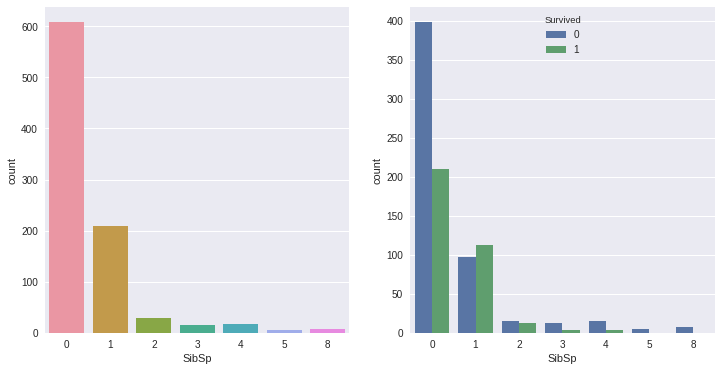

In [9]:
plt.figure(figsize=[12, 6])
plt.subplot(121)
sns.countplot(x='SibSp', data=training_data)
plt.subplot(122)
sns.countplot(x='SibSp', hue='Survived', data=training_data)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


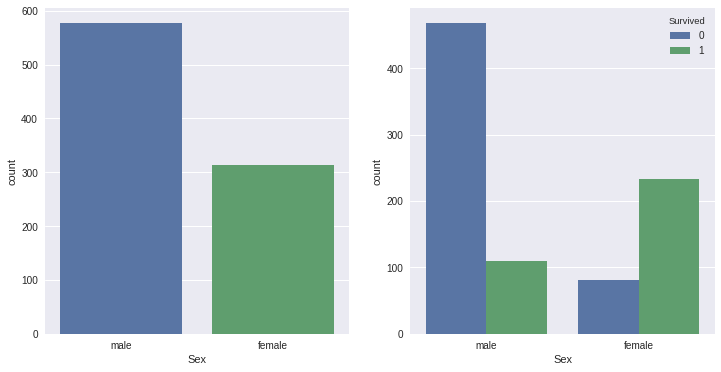

In [10]:
plt.figure(figsize=[12, 6])
plt.subplot(121)
sns.countplot(x='Sex', data=training_data)
plt.subplot(122)
sns.countplot(x='Sex', hue='Survived', data=training_data)

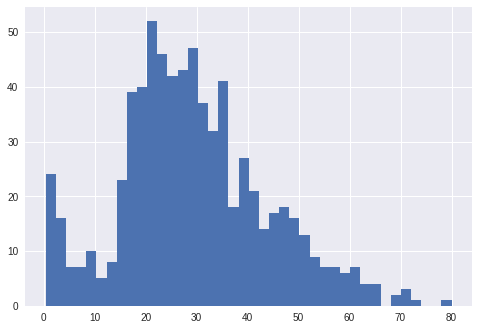

In [11]:
training_data['Age'].hist(bins=40)

# DATA CLEANING


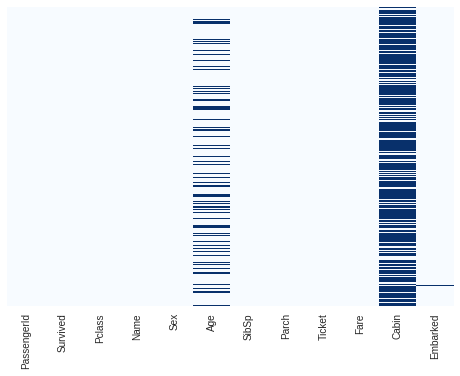

In [12]:
sns.heatmap(training_data.isnull(), yticklabels=False, cbar=False, cmap='Blues')

In [0]:
# Remove unnecessary columns
training_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)

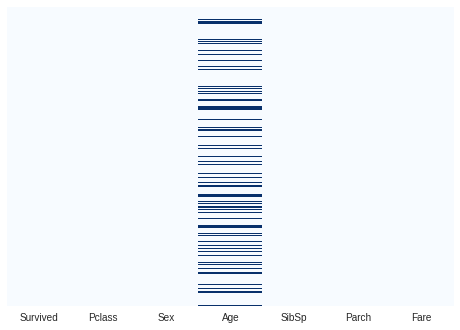

In [14]:
sns.heatmap(training_data.isnull(), yticklabels=False, cbar=False, cmap='Blues')

In [0]:
training_data['Age'].fillna(training_data['Age'].mean(), inplace=True)

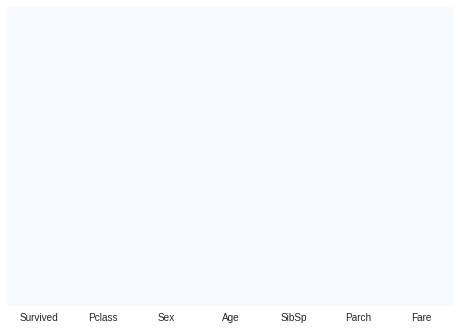

In [16]:
sns.heatmap(training_data.isnull(), yticklabels=False, cbar=False, cmap='Blues')

In [0]:
# Remove Sex column from the dataset and replace it with male column

male = pd.get_dummies(training_data['Sex'], drop_first=True)

In [0]:
training_data.drop('Sex', axis=1, inplace=True)

In [0]:
# pd.concat requires that the indices be unique. To remove rows with duplicate indices, use
training_data = training_data.loc[~training_data.index.duplicated(keep='first')]

In [0]:
training_data = pd.concat([training_data, male], axis=1)

In [21]:
training_data.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1


In [0]:
# Get X and y values

X = training_data.drop('Survived', axis=1).values
y = training_data['Survived'].values

# MODEL TRAINING

In [0]:
# import train_test_split from scikit
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [24]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

# MODEL TESTING

In [0]:
y_predict = classifier.predict(X_test)

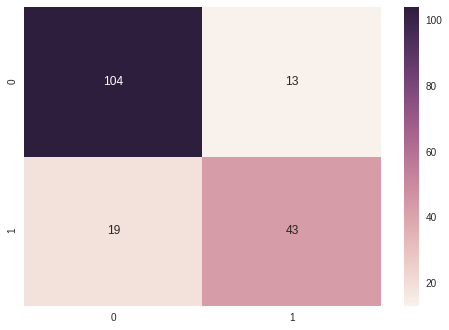

In [26]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predict)

sns.heatmap(cm, annot=True, fmt='d')

In [27]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       117
           1       0.77      0.69      0.73        62

   micro avg       0.82      0.82      0.82       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.82      0.82      0.82       179

